In [238]:
# I will be using LSTM model to predict 'GOOGL' stock price in the 'x' days in the future.
# First I will import all the required libraries for this model

import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [239]:
#Load 'GOOGL' stock history from 'yahoo'
df = web.DataReader('GOOGL', data_source='yahoo', start='2014-01-01', end='2020-11-05')
 
#show the data
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,559.434448,554.684692,558.288269,557.117126,3639100.0,557.117126
2014-01-03,559.024048,553.018005,558.058044,553.053040,3330000.0,553.053040
2014-01-06,559.989990,553.773804,557.062073,559.219238,3535000.0,559.219238
2014-01-07,570.415405,561.141113,563.063049,570.000000,5100000.0,570.000000
2014-01-08,574.234253,567.212219,573.573547,571.186157,4480500.0,571.186157


In [240]:
#Get the data metrices
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1725.000000,1725.000000,1725.000000,1725.000000,1.725000e+03,1725.000000
mean,945.737717,927.954907,937.067163,937.183998,2.010673e+06,937.183998
std,303.196074,295.836286,299.161181,299.725826,1.097344e+06,299.725826
min,500.279999,490.910004,499.239990,497.059998,5.206000e+05,497.059998
25%,678.739990,663.080017,671.989990,671.669983,1.357500e+06,671.669983
50%,945.429993,934.049988,941.030029,940.299988,1.694100e+06,940.299988
75%,1176.270020,1150.839966,1159.449951,1164.939941,2.281300e+06,1164.939941
max,1791.819946,1741.030029,1770.449951,1762.500000,1.285810e+07,1762.500000


In [241]:
#Get the number of rows and columns in the data set
df.shape

(1725, 6)

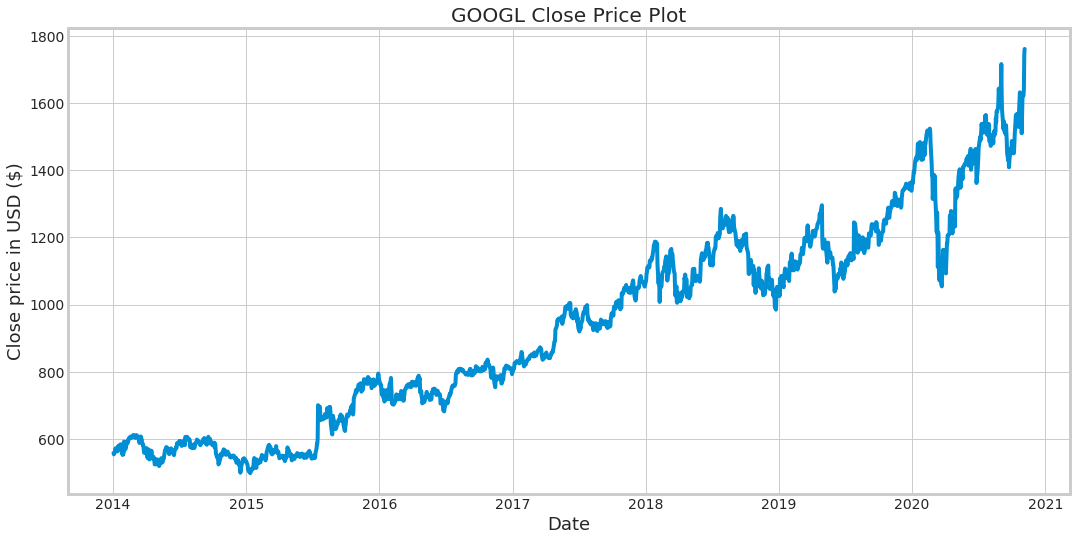

In [242]:
#Visualize the 'GOOGL' data-set, closing price
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.title('GOOGL Close Price Plot')
plt.plot(df['Close'])
plt.show()


In [243]:
#Create DataFrame with only 'Close' column
data = df.filter(['Close'])
#Convert the DataFrame to numpy array
dataset = data.values
#Get the number to rows ro train the model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1380

In [244]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.04745948],
       [0.04424788],
       [0.04912065],
       ...,
       [0.90766851],
       [0.9868425 ],
       [1.        ]])

In [245]:
# Create the training data set 
#Create the scaled traning data set 
train_data = scaled_data[0:training_data_len, :]
#Split the data in X_train and y_train data set
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(X_train)
    print(y_train)
    print()



[array([0.04745948, 0.04424788, 0.04912065, 0.05764003, 0.05857738,
       0.05423068, 0.05420695, 0.05135926, 0.06180875, 0.06150026,
       0.06450615, 0.06225568, 0.06746463, 0.06798669, 0.06604076,
       0.05169544, 0.04275678, 0.05137113, 0.0450073 , 0.05626758,
       0.07429515, 0.05549239, 0.05736318, 0.05935657, 0.06598539,
       0.07289901, 0.07111524, 0.07793785, 0.07655754, 0.08178226,
       0.08292927, 0.086125  , 0.08274734, 0.08344738, 0.08332082,
       0.08676972, 0.08973211, 0.08979934, 0.08941966, 0.08801161,
       0.08288577, 0.08771894, 0.08904393, 0.08957786, 0.08767148,
       0.08639795, 0.08181785, 0.08470909, 0.07749488, 0.07106382,
       0.07869727, 0.08627529, 0.08152518, 0.08069857, 0.07511389,
       0.06518251, 0.06549496, 0.05491495, 0.04791827, 0.05023993])]
[0.048009235917923776]

[array([0.04745948, 0.04424788, 0.04912065, 0.05764003, 0.05857738,
       0.05423068, 0.05420695, 0.05135926, 0.06180875, 0.06150026,
       0.06450615, 0.06225568, 0.0

In [246]:
#Convert X_train and y_train into numpy array 
X_train, y_train = np.array(X_train), np.array(y_train)

In [247]:
#Reshape the dataset. LSTM assumes the data is 3 dimensional
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1320, 60, 1)

In [248]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [249]:
#Compile the model. Use 'adam' and 'mse', 'mse' determines the degree of errors and 'adam' optimizes 'mse'
model.compile(optimizer='adam', loss='mean_squared_error')

In [290]:
#Train the model using '.fit' method
model.fit(X_train, y_train, batch_size=3, epochs=3)

Epoch 1/3
440/440 [==============================] - 19s 43ms/step - loss: 1.4818e-04
Epoch 2/3
440/440 [==============================] - 19s 44ms/step - loss: 1.6551e-04
Epoch 3/3
440/440 [==============================] - 19s 44ms/step - loss: 1.3777e-04


In [291]:
#Create test data set. Create a new array containing scaled values from row 1380 to 1725
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [292]:
#Convert the data into numpy array 
X_test = np.array(X_test)

In [293]:
#Reshape to 3 dimensions in order to load into LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(345, 60, 1)

In [294]:
#Get the model predicted values and inverse the scaled data to make sure the X_test values are same as y_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [295]:
#Evaluate the model using root mean squared error (RMSE). Lower the RMSE the better model performs
rmse = np.sqrt( np.mean(predictions - y_test)** 2)
rmse
#RMSE of 4.44 is decent

4.436888586956521

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


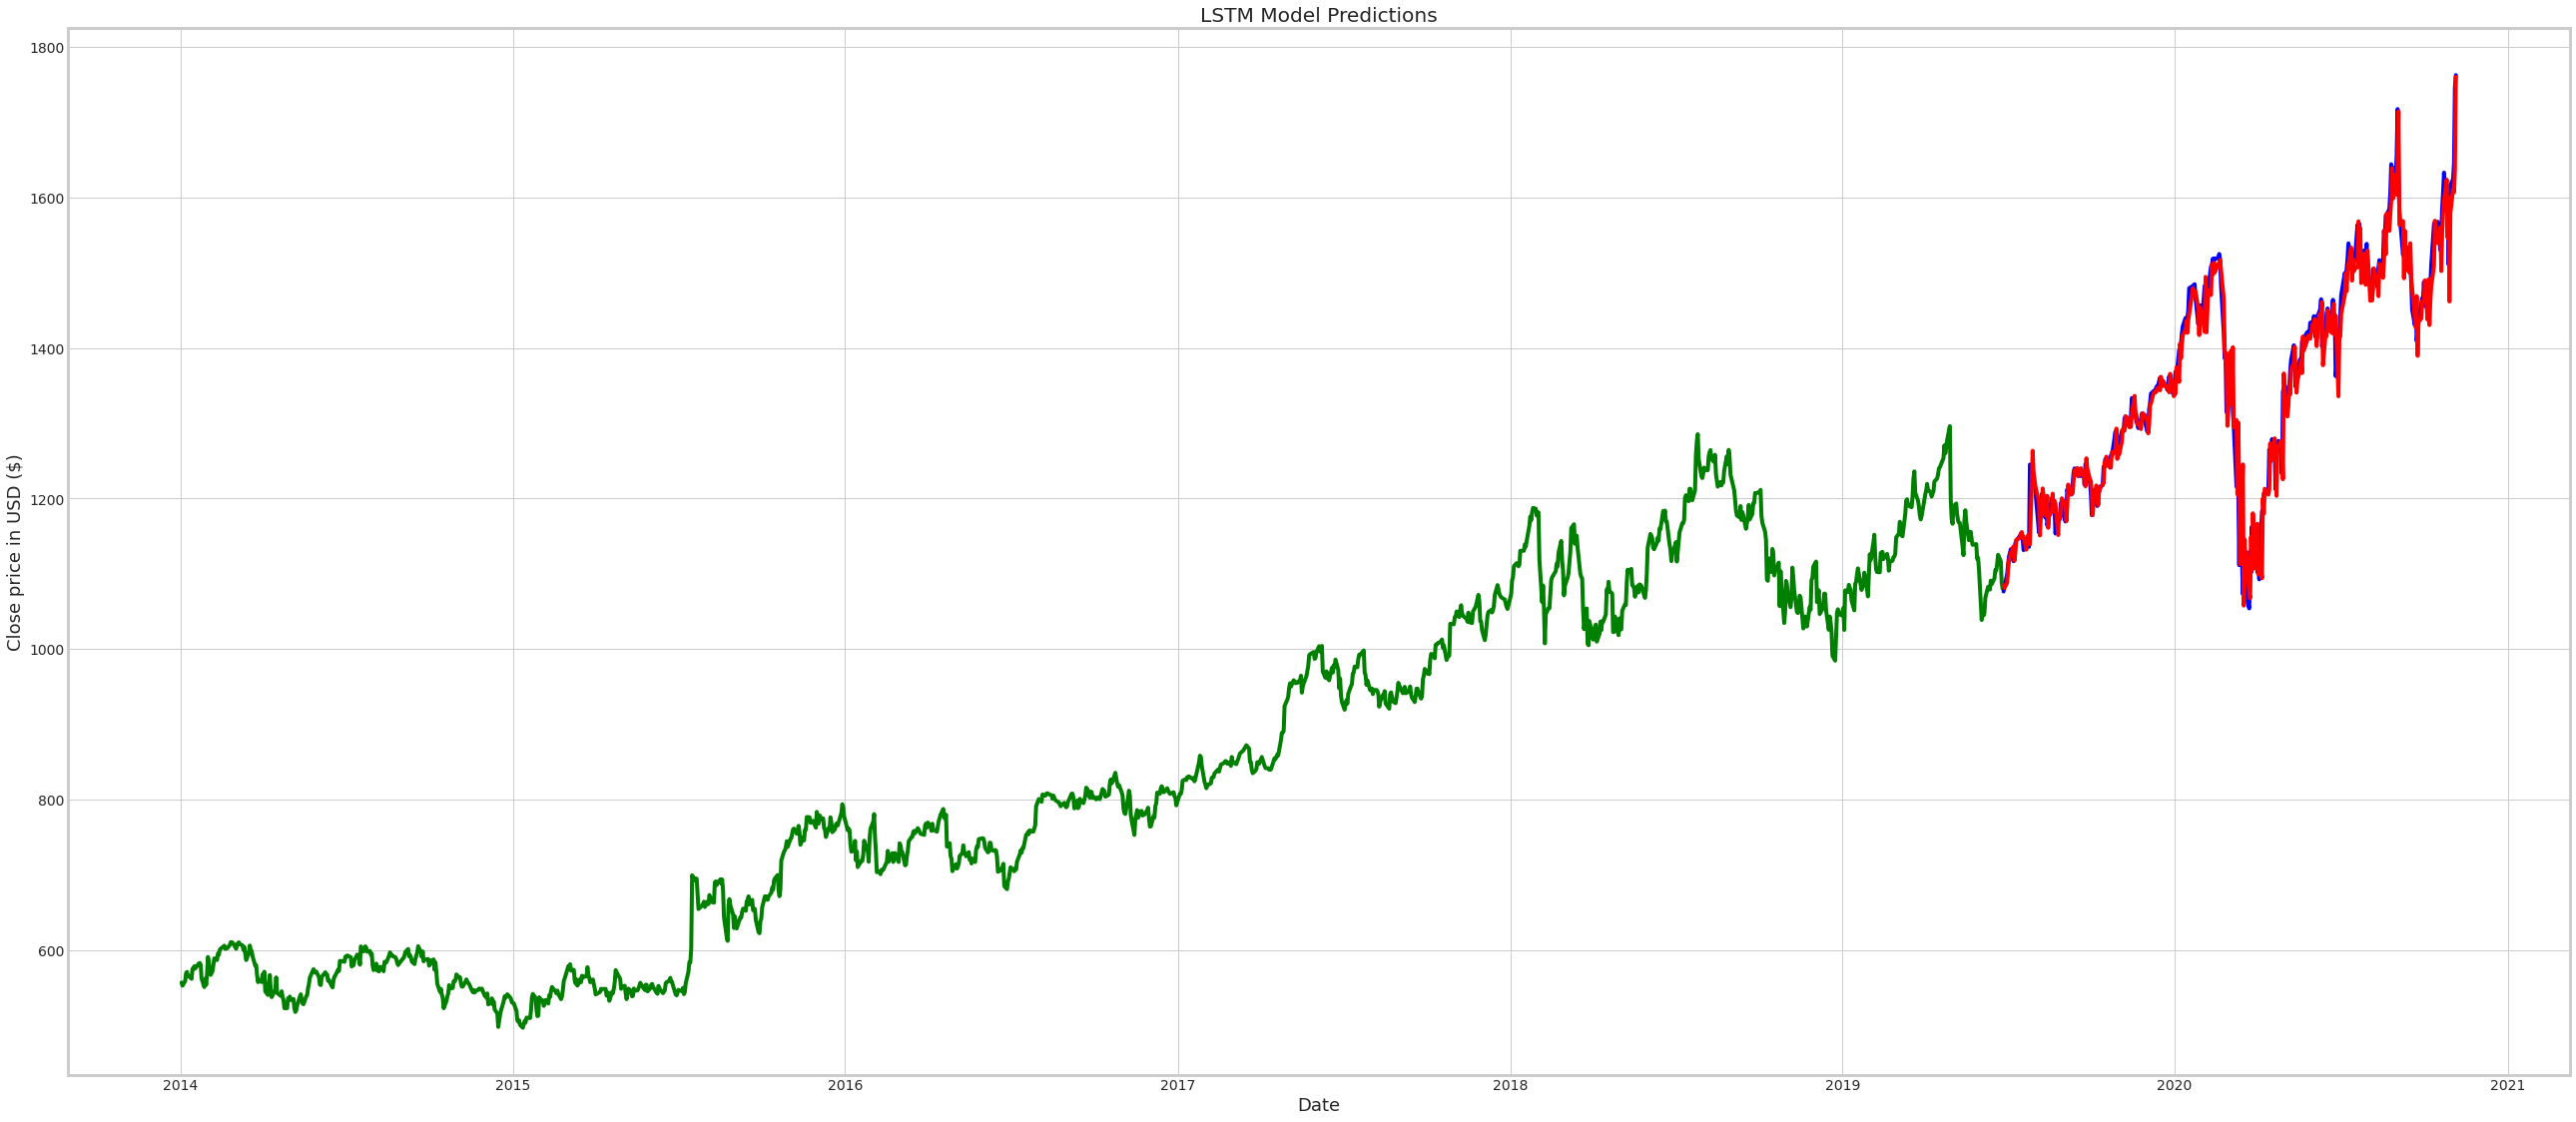

In [300]:
#Visualize the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Plot the data
plt.figure(figsize=(40, 18))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.title('LSTM Model Predictions')
plt.plot(train['Close'], color = 'green')
plt.plot(valid['Close'], color = 'blue')
plt.plot(valid['Predictions'], color='red')
plt.show()
# 'green' line is the close price since 2014, 'blue' is actual price, and 'red' is predicted price

In [297]:
#Show the Valid and Predicted prices 
valid

,Close,Predictions
Date,,
2019-06-27,1076.630005,1084.860596
2019-06-28,1082.800049,1080.948853
2019-07-01,1100.000000,1088.309570
2019-07-02,1112.599976,1106.012573
2019-07-03,1122.989990,1117.371826
...,...,...
2020-10-30,1616.109985,1579.254272
2020-11-02,1624.319946,1611.205322
2020-11-03,1645.660034,1606.903931


In [298]:
#Predict the future stock prices
#get the quote
googl_quote = web.DataReader('GOOGL', data_source='yahoo', start='2014-01-01', end='2020-11-19')
#Create new data frame with 'Close' price
new_df = googl_quote.filter(['Close'])
#Get the last 60 days of new_df and convert into an array
last_60_days = new_df[-60:].values
#Scale the data in between (0,1)
scaled_60_days = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the scaled data to X_test
X_test.append(scaled_60_days)
#Convert to array
X_test = np.array(X_test)
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Inverse the scaling
pred_price = scaler.inverse_transform(pred_price)
#print the predicted price for 2020-11-20
print(pred_price)

[[1744.8666]]


In [299]:
#Print the actual stock price for 2020-11-20
googl_quote2 = web.DataReader('GOOGL', data_source='yahoo', start='2020-11-20', end='2020-11-20')
print(googl_quote2)
#The model's prediction is 99% accurate

                   High   Low  Open        Close   Volume    Adj Close
Date                                                                  
2020-11-20  1768.362549  1735  1762  1736.380005  1385322  1736.380005
2020-11-20  1768.359985  1735  1762  1736.380005  1384700  1736.380005
